In [1]:
import pandas as pd
data = pd.read_csv("train.csv")

In [2]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
import pixiedust

Pixiedust database opened successfully


In [4]:
display(data)

In [5]:
data = data.drop(['region','employee_id'],axis =1)

In [6]:
data.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
data.shape

(54808, 12)

In [8]:
data.isna().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
data["education"].fillna( method ='ffill', inplace = True)
data = data.fillna(data.mean())
data.isna().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
#data = data.dropna()

In [11]:
data.shape

(54808, 12)

In [12]:
data.dtypes

department               object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
categorical_cols

['department', 'education', 'gender', 'recruitment_channel']

In [15]:
#['department', 'region', 'education', 'gender', 'recruitment_channel']
print(data['recruitment_channel'].nunique())
print(data['department'].nunique())
print(data['education'].nunique())
print(data['gender'].nunique())

3
9
3
2


In [16]:
print(data['department'].unique())
print(data['recruitment_channel'].unique())
print(data['education'].unique())
print(data['gender'].unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['sourcing' 'other' 'referred']
["Master's & above" "Bachelor's" 'Below Secondary']
['f' 'm']


In [17]:
# instantiate labelencoder object
le = LabelEncoder()
# apply le on column gender
data['gender'] = le.fit_transform(data['gender'])
data.head(2)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,other,1,30,5.0,4,0,0,60,0


In [18]:
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
features = ['department', 'education', 'recruitment_channel']
ohe = OneHotEncoder(categorical_features = features, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

In [19]:
# apply OneHotEncoder on categorical feature columns
#X_ohe = ohe.fit_transform(data) # It returns an numpy array
ohe = OneHotEncoder(sparse=False)
X_ohe = ohe.fit_transform(data[['department', 'education', 'recruitment_channel']])

In [20]:
X_ohe.shape

(54808, 15)

In [21]:
type(X_ohe)

numpy.ndarray

In [22]:
X_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [23]:
df= pd.get_dummies(data['department'], prefix=['department'],drop_first=True)
df1 =  pd.get_dummies(data['education'], prefix=['education'],drop_first=True)
df2 =  pd.get_dummies(data['recruitment_channel'], prefix=['RC'],drop_first=True)
data = pd.concat([data, df, df1,df2],axis=1)
data = data.drop(['department', 'education', 'recruitment_channel'],axis=1)

In [24]:
data.head(2)

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,['department']_Finance,...,['department']_Legal,['department']_Operations,['department']_Procurement,['department']_R&D,['department']_Sales & Marketing,['department']_Technology,['education']_Below Secondary,['education']_Master's & above,['RC']_referred,['RC']_sourcing
0,0,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,0,0,1,0,1
1,1,1,30,5.0,4,0,0,60,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
data.shape

(54808, 21)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = data.drop(['is_promoted'],axis=1)
Y = data['is_promoted']


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 42, test_size = 0.2)

In [29]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train,Y_train)

C:\Users\saumya.m.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predict1 = logit.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(Y_test,predict1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.87      0.20      0.32       908

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.90      0.60      0.64     10962
weighted avg       0.93      0.93      0.91     10962



In [32]:
fpr,tpr,threshold = roc_curve(Y_test,logit.predict_proba(X_test)[:,1])

In [33]:
logit_roc_auc_1 = roc_auc_score(Y_test,logit.predict(X_test))
logit_roc_auc_1

0.5983268543696637

In [34]:
from sklearn.metrics import f1_score
# f1 score
score = f1_score(predict1, Y_test)
score

0.32437275985663083

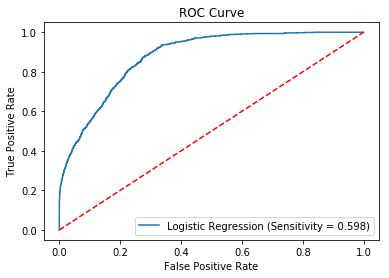

In [35]:
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label = 'Logistic Regression (Sensitivity = %0.3f)'%logit_roc_auc_1)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

We can see that recall for class 1 is very bad. Thus our model is not good.

In [36]:
pd.value_counts(data['is_promoted'])


0    50140
1     4668
Name: is_promoted, dtype: int64

There is class imbalance in our data. We will use SMOTE or ADASYN for overcoming class imbalance problem.

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# applying SMOTE to our data and checking the class counts
X_resampled, y_resampled = SMOTE().fit_resample(X, Y)
print(sorted(Counter(y_resampled).items()))

[(0, 50140), (1, 50140)]


In [38]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X_resampled,y_resampled,test_size = 0.2, random_state =2 )

In [39]:
logit.fit(X1_train, Y1_train)

C:\Users\saumya.m.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
pred1 = logit.predict(X1_test)

In [41]:
print(classification_report(Y1_test, pred1))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79     10140
           1       0.78      0.84      0.81      9916

   micro avg       0.80      0.80      0.80     20056
   macro avg       0.80      0.80      0.80     20056
weighted avg       0.80      0.80      0.80     20056



In [42]:
from sklearn.metrics import f1_score
# f1 score
score = f1_score(pred1, Y1_test)
score

0.8065421465208554

In [43]:
from imblearn.over_sampling import ADASYN
from collections import Counter
# applying SMOTE to our data and checking the class counts
X_resampled1, y_resampled1 = ADASYN().fit_resample(X, Y)
print(sorted(Counter(y_resampled1).items()))

[(0, 50140), (1, 50807)]


In [44]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X_resampled1,y_resampled1,test_size = 0.2, random_state =2 )

In [45]:
logit.fit(X2_train, Y2_train)

C:\Users\saumya.m.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
pred2 = logit.predict(X2_test)

In [47]:
print(classification_report(Y2_test, pred2))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     10195
           1       0.76      0.86      0.81      9995

   micro avg       0.80      0.80      0.80     20190
   macro avg       0.80      0.80      0.80     20190
weighted avg       0.80      0.80      0.80     20190



In [48]:
from sklearn.metrics import f1_score
# f1 score
score = f1_score(pred2, Y2_test)
score

0.809894855426211

In [49]:
test = pd.read_csv("test.csv")

In [50]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [51]:
test1 = pd.read_csv("test.csv")

In [52]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [53]:
test.keys()

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [54]:
test = test.drop(['region','employee_id'],axis =1)
test["education"].fillna( method ='ffill', inplace = True)
test = test.fillna(test.mean())
test.isna().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [55]:
#['department', 'region', 'education', 'gender', 'recruitment_channel']
print(test['recruitment_channel'].nunique())
print(test['department'].nunique())
print(test['education'].nunique())
print(test['gender'].nunique())

3
9
3
2


In [56]:
# instantiate labelencoder object
le = LabelEncoder()
# apply le on column gender
test['gender'] = le.fit_transform(test['gender'])
test.head(2)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,1,sourcing,1,24,3.339146,1,1,0,77
1,HR,Bachelor's,0,other,1,31,3.000000,5,0,0,51


In [57]:
df4= pd.get_dummies(test['department'], prefix=['department'],drop_first=True)
df5 =  pd.get_dummies(test['education'], prefix=['education'],drop_first=True)
df6 =  pd.get_dummies(test['recruitment_channel'], prefix=['RC'],drop_first=True)

In [58]:
test = pd.concat([test, df4, df5,df6],axis=1)
test = test.drop(['department','education', 'recruitment_channel'],axis=1)

In [59]:
test.shape

(23490, 20)

In [60]:
test_pred = logit.predict(test)
len(test_pred)

23490

In [61]:
import numpy as np
employee_id=np.array(test1['employee_id'])
len(employee_id)

23490

In [62]:
submission = pd.DataFrame({'employee_id': employee_id, 'is_promoted': list(test_pred)}, columns=['employee_id', 'is_promoted'])

In [63]:
submission.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [64]:
submission.shape

(23490, 2)

In [ ]:
# Install `XlsxWriter` 
#!pip install XlsxWriter



In [65]:
# Specify a writer
writer = pd.ExcelWriter('submission.xlsx', engine='xlsxwriter')

# Write your DataFrame to a file     
submission.to_excel(writer, 'Sheet1')

# Save the result 
writer.save()

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
random_forest1 = RandomForestClassifier( max_depth=15)
random_forest1.fit(X2_train, Y2_train)

C:\Users\saumya.m.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
pred_forest = random_forest1.predict(X2_test)
#X2_train,X2_test,Y2_train,Y2_test

In [77]:
print(classification_report(Y2_test, pred_forest))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10195
           1       0.94      0.94      0.94      9995

   micro avg       0.94      0.94      0.94     20190
   macro avg       0.94      0.94      0.94     20190
weighted avg       0.94      0.94      0.94     20190



In [78]:
score = f1_score(pred_forest, Y2_test)
score

0.9374094610120385

In [79]:
test_pred_forest = random_forest1.predict(test)
len(test_pred_forest)

23490

In [82]:
submission = pd.DataFrame({'employee_id': employee_id, 'is_promoted': list(test_pred_forest)}, columns=['employee_id', 'is_promoted'])

In [83]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [84]:
# Specify a writer
writer = pd.ExcelWriter('submission.xlsx', engine='xlsxwriter')

# Write your DataFrame to a file     
submission.to_excel(writer, 'Sheet1')

# Save the result 
writer.save()